# Import software libraries

In [3]:
import sys                             # Read system parameters
import os                              # Interact with the operating system
import numpy as np                     # Work with multi-dimensional arrays and matrices
import pandas as pd                    # Manipulate and analyze data
import matplotlib                      # Create 2D charts
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp                     # Perform scientific computing and advanced mathematics
import sklearn                         # Perform data mining and analysis
import seaborn as sb                   # Perform data visualization

# Summarize software libraries used
print('Libraries used in this project:')
print('- NumPy {}'.format(np.__version__))
print('- Pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(matplotlib.__version__))
print('- SciPy {}'.format(sp.__version__))
print('- Scikit-learn {}'.format(sklearn.__version__))
print('- Python {}\n'.format(sys.version))

Libraries used in this project:
- NumPy 1.16.2
- Pandas 0.24.2
- Matplotlib 3.0.3
- SciPy 1.2.1
- Scikit-learn 0.20.3
- Python 3.7.6 | packaged by conda-forge | (default, Mar 23 2020, 23:03:20) 
[GCC 7.3.0]



# Load the dataset

In [9]:
PROJECT_ROOT_DIR = '.'
DATA_PATH = os.path.join(PROJECT_ROOT_DIR, 'seoul_bike_data')
print('Data files in this project:', os.listdir(DATA_PATH) )

# Read the raw dataset
data_file = os.path.join( DATA_PATH, 'seoul_bike_data.csv' )
data = pd.read_csv( data_file )
print('Loaded {} records from {}.\n'.format(len(data), data_file))

Data files in this project: ['seoul_bike_data.csv']
Loaded 8394 records from ./seoul_bike_data/seoul_bike_data.csv.



# Get acquainted with the dataset

In [10]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8394 entries, 0 to 8393
Data columns (total 9 columns):
bikes_rented    8394 non-null int64
temp            8394 non-null float64
humidity        8394 non-null int64
wind_speed      8394 non-null float64
visibility      8394 non-null int64
dew_temp        8394 non-null float64
solar_rad       8394 non-null float64
rainfall        8394 non-null float64
snowfall        8394 non-null float64
dtypes: float64(6), int64(3)
memory usage: 590.3 KB
None


# Show example records

In [11]:
print(data.head(10))

   bikes_rented  temp  humidity  wind_speed  visibility  dew_temp  solar_rad  \
0           254  -5.2        37         2.2        2000     -17.6       0.00   
1           204  -5.5        38         0.8        2000     -17.6       0.00   
2           173  -6.0        39         1.0        2000     -17.7       0.00   
3           107  -6.2        40         0.9        2000     -17.6       0.00   
4            78  -6.0        36         2.3        2000     -18.6       0.00   
5           100  -6.4        37         1.5        2000     -18.7       0.00   
6           181  -6.6        35         1.3        2000     -19.5       0.00   
7           460  -7.4        38         0.9        2000     -19.3       0.00   
8           930  -7.6        37         1.1        2000     -19.8       0.01   
9           490  -6.5        27         0.5        1928     -22.4       0.23   

   rainfall  snowfall  
0       0.0       0.0  
1       0.0       0.0  
2       0.0       0.0  
3       0.0       0.0  

# Examine a general summary of statistics

In [30]:
mean = data ['bikes_rented'].mean()
print(mean)
std = data ['temp'].std()
print(std)
min = data ['humidity'].min()
print(min)
max = data ['wind_speed'].max()
print(max)
median = data ['visibility'].median()
print(median)
mode = data ['solar_rad'].mode()
print(mode)

731.3747915177507
12.108976701450478
0
7.4
1690.0
0    0.0
dtype: float64


# Look for columns that correlate with `bikes_rented`

In [32]:
corr_matrix = data.corr()
corr_matrix['bikes_rented'].sort_values(ascending=False)
print(corr_matrix)

              bikes_rented      temp  humidity  wind_speed  visibility  \
bikes_rented      1.000000  0.563440 -0.201466    0.120961    0.213989   
temp              0.563440  1.000000  0.165484   -0.044827    0.031410   
humidity         -0.201466  0.165484  1.000000   -0.336857   -0.549300   
wind_speed        0.120961 -0.044827 -0.336857    1.000000    0.184935   
visibility        0.213989  0.031410 -0.549300    0.184935    1.000000   
dew_temp          0.401160  0.914372  0.538730   -0.182518   -0.180199   
solar_rad         0.272748  0.354692 -0.457904    0.321812    0.154676   
rainfall         -0.128794  0.052120  0.237436   -0.025538   -0.169727   
snowfall         -0.151881 -0.218070  0.110487   -0.004840   -0.123300   

              dew_temp  solar_rad  rainfall  snowfall  
bikes_rented  0.401160   0.272748 -0.128794 -0.151881  
temp          0.914372   0.354692  0.052120 -0.218070  
humidity      0.538730  -0.457904  0.237436  0.110487  
wind_speed   -0.182518   0.321812 -

# Visually analyze cross correlations

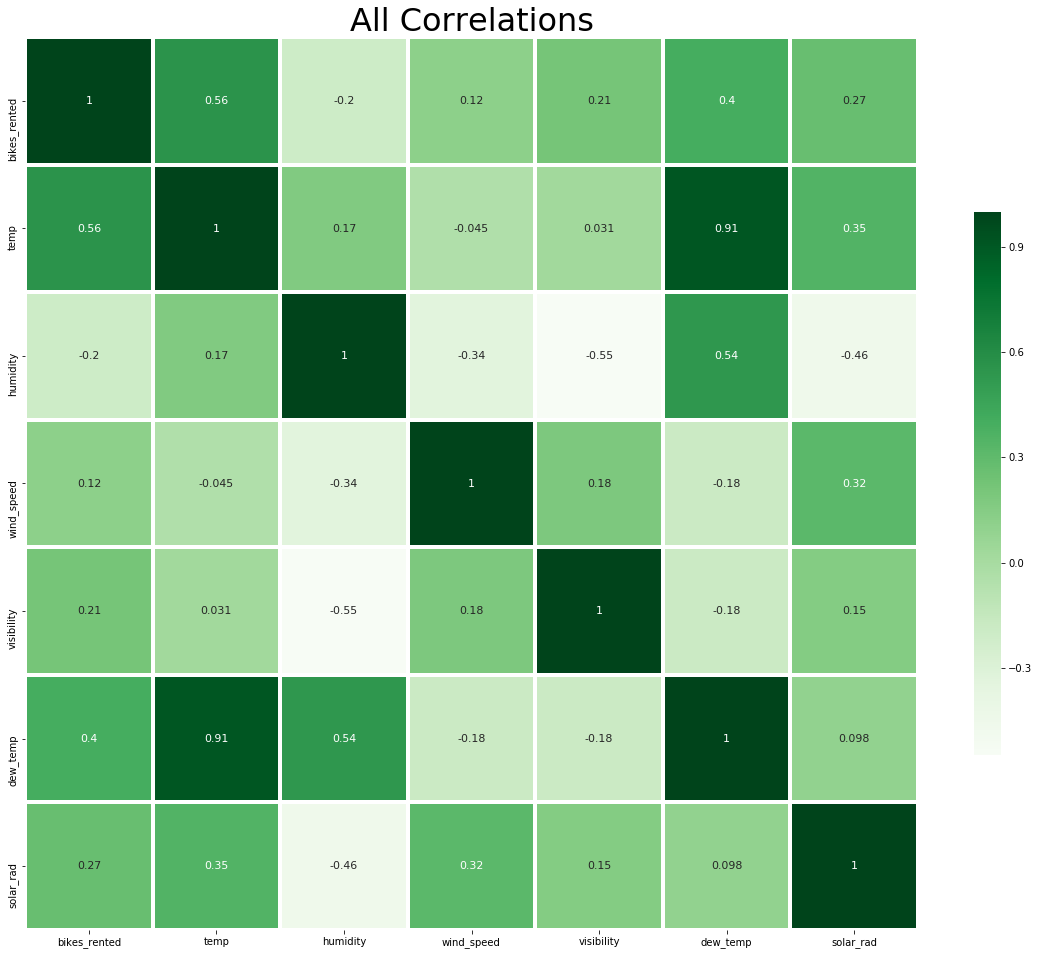

In [34]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

f, axes = plt.subplots(figsize=(20, 20))
plt.title('All Correlations',fontsize=32)

features = ['bikes_rented', 'temp', 'humidity', 'wind_speed', 'visibility', 'dew_temp', 'solar_rad' ]

sb.heatmap(data[features].corr(),
           linewidths = 3.0,
           square = True,
           cmap = 'Greens',
           linecolor='w',
           annot=True,
           annot_kws={'size':11},
           cbar_kws={'shrink': .5});


# Use histograms to visualize the distribution of all features

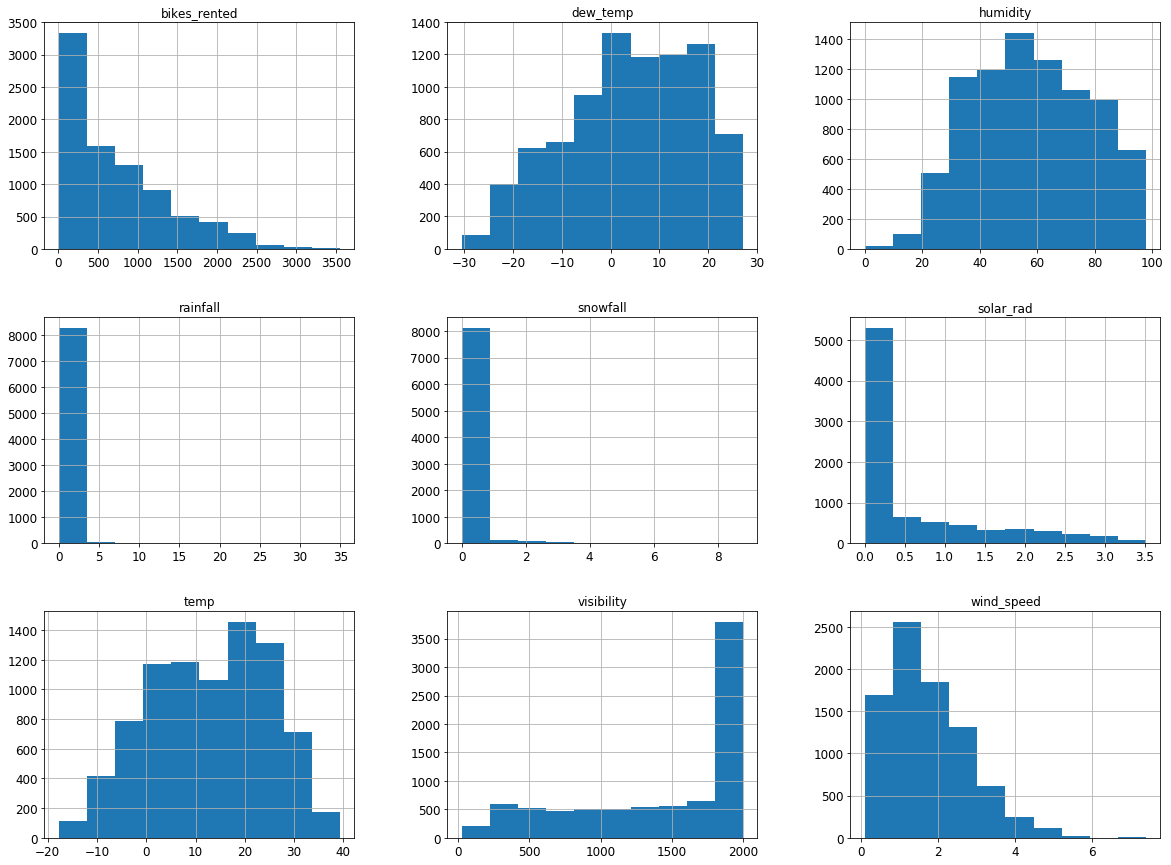

<Figure size 432x288 with 0 Axes>

In [36]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

data.hist(figsize=(20,15));
plt.figure();

# Split the data into training and testing sets and labels

In [38]:
from sklearn.model_selection import train_test_split

label_columns = ['bikes_rented']

training_columns = ['bikes_rented', 'temp', 'humidity', 'wind_speed', 'visibility', 'dew_temp', 'solar_rad']

data_train,data_test,data_train_labels,data_test_labels = train_test_split(data[training_columns], 
                                                                           data[label_columns], 
                                                                           random_state = 42)

print(f'Original Set:      {data.shape}')
print('------------------------------')
print(f'Training Features: {data_train.shape}')
print(f'Testing Features:  {data_test.shape}')
print(f'Training Labels:   {data_train_labels.shape}')
print(f'Testing Labels:    {data_test_labels.shape}')

Original Set:      (8394, 9)
------------------------------
Training Features: (6295, 7)
Testing Features:  (2099, 7)
Training Labels:   (6295, 1)
Testing Labels:    (2099, 1)


# Build and test an initial linear regression model

In [39]:
from sklearn.linear_model import LinearRegression
from time import time


regressor = LinearRegression()

start = time()
regressor.fit(data_train, data_train_labels);
end=time()
train_time = (end - start) * 1000
print('Model took {:,.2f} milliseconds to fit.'.format(train_time))

Model took 22.68 milliseconds to fit.


# Use the holdout dataset to test the model

In [40]:
score = regressor.score(data_test, data_test_labels)
'Score: {}%'.format(int(round(score * 100)))

'Score: 100%'

# Compare the first ten predictions to actual values

In [41]:

predicted_bikes = regressor.predict(data_test)
predictions = data_test_labels.copy()
predictions['predicted'] = predicted_bikes


with pd.option_context('float_format', '${:,.2f}'.format): print( predictions.head(10) )

      bikes_rented  predicted
33             328    $328.00
3898          1058  $1,058.00
766            273    $273.00
8071          1037  $1,037.00
4746          2378  $2,378.00
5422           695    $695.00
1426           170    $170.00
1328           322    $322.00
1076           321    $321.00
5209           670    $670.00


# Identify outliers

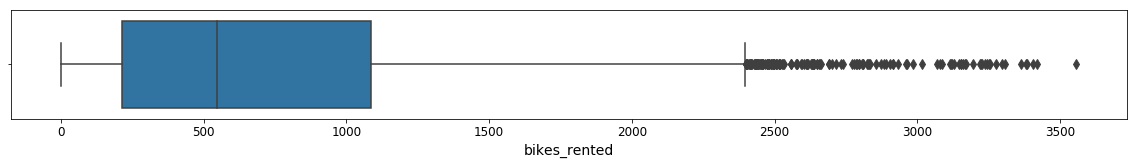

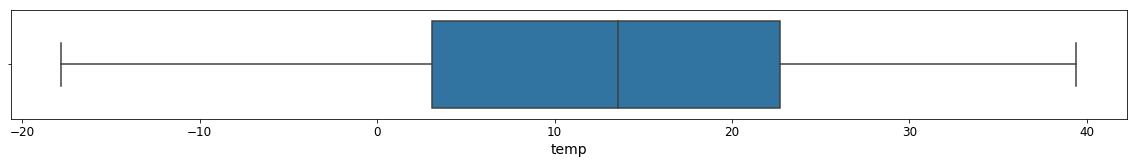

In [44]:
feature_list = ['bikes_rented','temp']

for feature in feature_list:
    plt.figure(figsize=(20,2))
    bplot = sb.boxplot(x=feature, data=data, orient ="h", fliersize=7)

# Examine data values in the outliers

In [45]:
data_train.loc[data_train_labels['bikes_rented'] > 3500]

,bikes_rented,temp,humidity,wind_speed,visibility,dew_temp,solar_rad
4743,3556,24.1,57,2.9,1301,15.0,0.56


In [46]:
data_train.loc[data_train['wind_speed'] > 6]

,bikes_rented,temp,humidity,wind_speed,visibility,dew_temp,solar_rad
909,146,0.7,77,6.7,692,-2.8,0.0
3112,1805,19.7,52,7.2,2000,9.5,0.2
3115,133,17.5,70,7.3,1634,11.9,0.0
6230,49,25.3,70,6.9,925,19.4,0.0
3108,913,21.2,35,7.4,1992,5.1,1.8


# Drop outliers from the training dataset

In [48]:
print(f'{len(data_train):6d} all bikes rented')
data_train = data_train.loc[data_train_labels['bikes_rented'] <= 3500]
data_train_labels = data_train_labels.loc[data_train_labels['bikes_rented'] <= 3500]
print(f'{len(data_train):6d} less than 3500 ')

data_train_labels = data_train_labels.loc[data_train['wind_speed'] <= 6]
data_train = data_train.loc[data_train['wind_speed'] <= 6]
print(f'{len(data_train):6d} less than 6 ')

  6295 all bikes rented
  6294 less than 3500 
  6289 less than 6 


# Compare the scale and distribution of `bikes_rented` and `wind_speed`

Maximum bikes_rented = 3418
Maximum wind_speed = 6.0


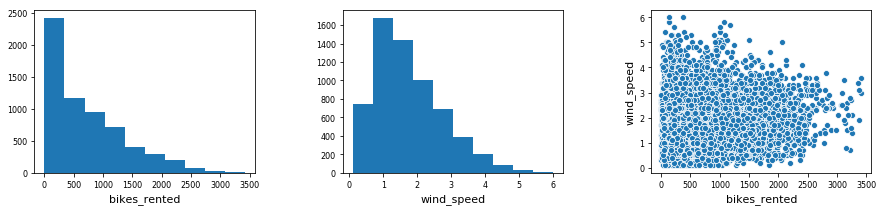

In [49]:
def compare_bikes_wind():

    print('Maximum bikes_rented =', data_train_labels.loc[data_train_labels['bikes_rented'].idxmax()]['bikes_rented']);
    print('Maximum wind_speed =', data_train.loc[data_train['wind_speed'].idxmax()]['wind_speed']);

    fig = plt.figure(figsize=(15,3))
    fig.subplots_adjust(wspace=.4)

    plt.rc('axes', titlesize=9)    
    plt.rc('axes', labelsize=11)    
    plt.rc('xtick', labelsize=8)    
    plt.rc('ytick', labelsize=8)    

    ax1=fig.add_subplot(1, 3, 1)
    plt.xlabel('bikes_rented')
    plt.hist(data_train_labels['bikes_rented'], label='bikes_rented');

    ax2=fig.add_subplot(1, 3, 2)
    plt.xlabel('wind_speed')
    plt.hist(data_train['wind_speed'], label='wind_speed');


    ax2=fig.add_subplot(1, 3, 3)
    sb.scatterplot(x=data_train_labels['bikes_rented'], y=data_train['wind_speed']);
    
compare_bikes_wind()    

# Transform `bikes_rented` and `wind_speed`, and compare results

Maximum bikes_rented = 8.136810863675537
Maximum wind_speed = 1.791759469228055


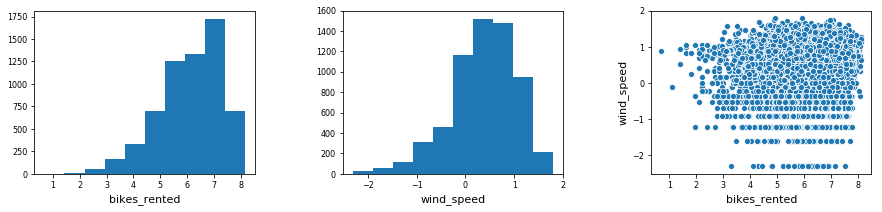

In [50]:

data_train['wind_speed'] = np.log(data_train['wind_speed'])
data_train_labels['bikes_rented'] = np.log(data_train_labels['bikes_rented'])

data_test['wind_speed'] = np.log(data_test['wind_speed'])
data_test_labels['bikes_rented'] = np.log(data_test_labels['bikes_rented'])


compare_bikes_wind()

# Build and test a new linear regression model

In [51]:
from sklearn.linear_model import LinearRegression


regressor = LinearRegression()

start = time()
regressor.fit(data_train, data_train_labels);
end=time()
train_time = (end - start) * 1000
print('Model took {:,.2f} milliseconds to fit.'.format(train_time))


score = regressor.score(data_test, data_test_labels)
'Score: {}%'.format(int(round(score * 100)))

Model took 2.97 milliseconds to fit.


'Score: 76%'

# Compare the first ten predictions to actual values for the new model

In [52]:

predicted_bikes = regressor.predict(data_test)
predictions = data_test_labels.copy()
predictions['predicted bikes'] = predicted_bikes


with pd.option_context('float_format', '${:,.2f}'.format): print( predictions.head(10) )

      bikes_rented  predicted bikes
33           $5.79            $5.24
3898         $6.96            $7.06
766          $5.61            $5.37
8071         $6.94            $6.72
4746         $7.77            $8.28
5422         $6.54            $6.15
1426         $5.14            $5.28
1328         $5.77            $5.24
1076         $5.77            $5.42
5209         $6.51            $6.06


# Convert the bike rentals back to their initial scale

In [53]:
import math
predictions = predictions.applymap(math.exp)


with pd.option_context('float_format', '${:,.2f}'.format): print( predictions.head(10) )

      bikes_rented  predicted bikes
33         $328.00          $189.27
3898     $1,058.00        $1,161.40
766        $273.00          $215.61
8071     $1,037.00          $827.58
4746     $2,378.00        $3,940.13
5422       $695.00          $469.97
1426       $170.00          $197.08
1328       $322.00          $189.10
1076       $321.00          $225.89
5209       $670.00          $429.75


### Author: Nazar Vasyuta